In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import math
from sklearn import svm
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import GridSearchCV




%matplotlib inline

In [3]:
ete= pd.read_csv('/Users/rashm/mlops/bhutan_landslide_data.csv')
ete.head(15)


,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,slide,1,1,1,2,1,7,1,5,2,4,1
1,1,slide,1,1,1,3,1,4,2,2,2,5,1
2,2,slide,1,1,1,2,3,7,1,1,1,3,0
3,3,slide,1,1,1,3,1,10,1,2,2,4,0
4,4,slide,1,1,1,3,1,10,1,4,3,5,0
5,5,slide,1,1,2,2,1,6,1,4,2,4,0
6,6,slide,1,1,1,2,2,5,1,3,1,5,0
7,7,slide,1,7,2,3,1,4,2,4,2,4,1
8,8,slide,1,7,2,3,3,3,2,2,1,0,1
9,9,slide,1,7,1,3,2,10,3,1,1,3,1


In [3]:
ete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FID                 1221 non-null   int64 
 1   Type                1221 non-null   object
 2   Code                1221 non-null   int64 
 3   Lithology           1221 non-null   int64 
 4   Altitude            1221 non-null   int64 
 5   Slope               1221 non-null   int64 
 6   Total curvature     1221 non-null   int64 
 7   Aspect              1221 non-null   int64 
 8   Distance to road    1221 non-null   int64 
 9   Distance to stream  1221 non-null   int64 
 10  Slope length        1221 non-null   int64 
 11  TWI                 1221 non-null   int64 
 12  STI                 1221 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 124.1+ KB


In [4]:
ete.shape

(1221, 13)

In [5]:
ete.describe

<bound method NDFrame.describe of        FID   Type  Code  Lithology  Altitude  Slope  Total curvature  Aspect   
0        0  slide     1          1         1      2                1       7  \
1        1  slide     1          1         1      3                1       4   
2        2  slide     1          1         1      2                3       7   
3        3  slide     1          1         1      3                1      10   
4        4  slide     1          1         1      3                1      10   
...    ...    ...   ...        ...       ...    ...              ...     ...   
1216  1216  slide     1          5         4      2                1       7   
1217  1217  slide     1          5         4      2                2       8   
1218  1218  slide     1          5         5      3                2       8   
1219  1219  slide     1          5         4      2                3       7   
1220  1220  slide     1          5         3      3                1       8   

     

<Axes: xlabel='Code', ylabel='count'>

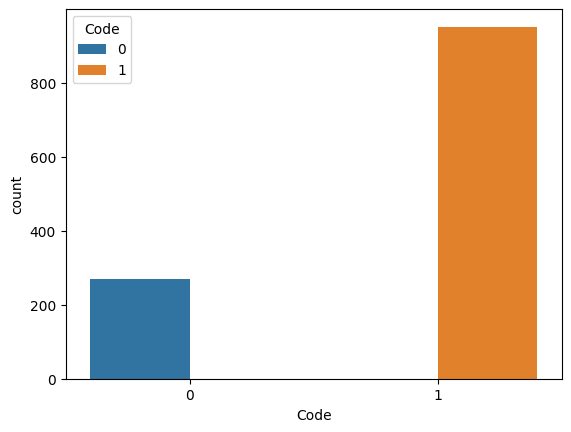

In [6]:
sns.countplot(x ="Code", hue ="Code",data = ete)

<Axes: xlabel='Code', ylabel='count'>

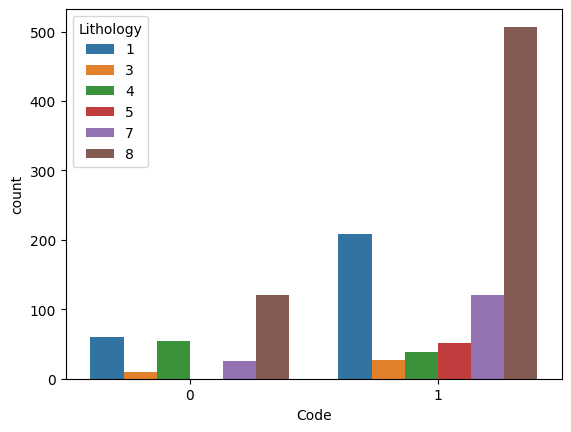

In [7]:
sns.countplot(x ="Code", hue ="Lithology",data = ete)

<Axes: xlabel='Code', ylabel='count'>

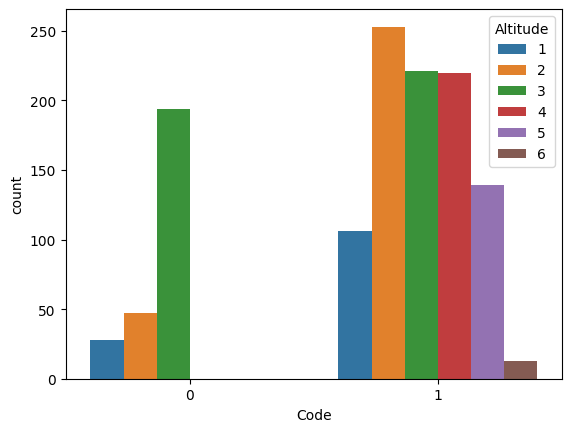

In [9]:
sns.countplot(x ="Code", hue ="Altitude",data = ete)

<Axes: xlabel='Code', ylabel='count'>

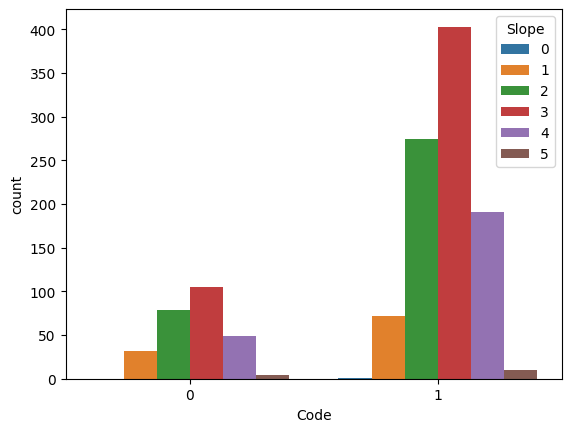

In [8]:
sns.countplot(x ="Code", hue ="Slope",data = ete)

<Axes: xlabel='Code', ylabel='count'>

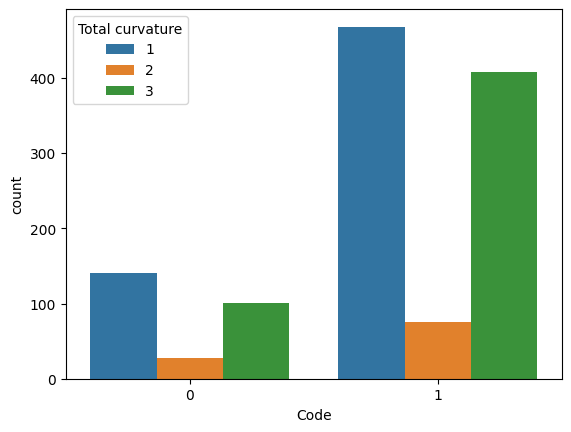

In [9]:
sns.countplot(x ="Code", hue ="Total curvature",data = ete)

<Axes: xlabel='Code', ylabel='count'>

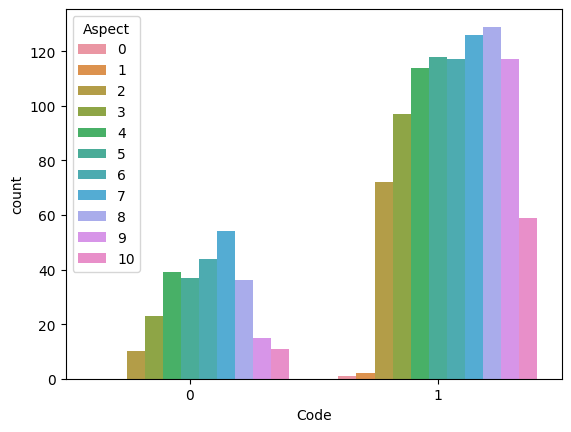

In [10]:
sns.countplot(x ="Code", hue ="Aspect",data = ete)

<Axes: xlabel='Code', ylabel='count'>

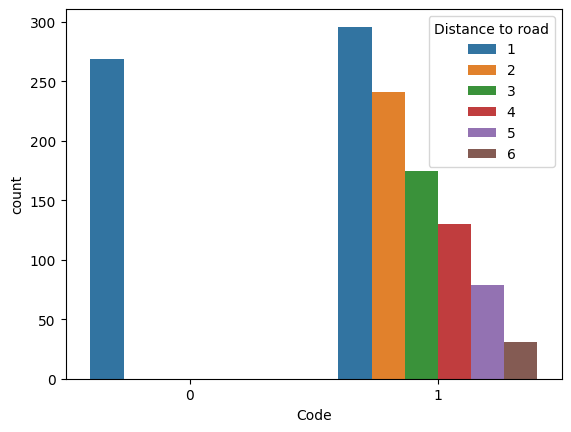

In [11]:
sns.countplot(x ="Code", hue ="Distance to road",data = ete)

<Axes: xlabel='Code', ylabel='count'>

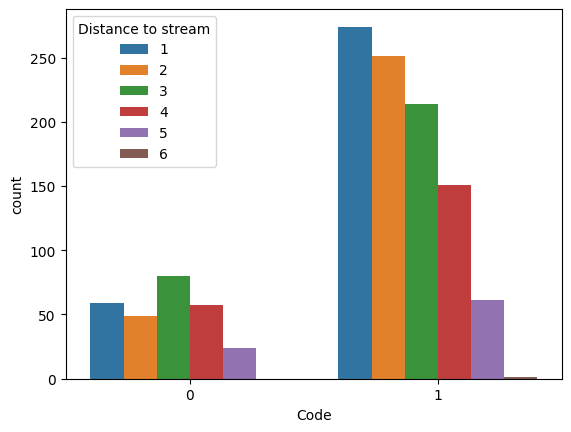

In [12]:
sns.countplot(x ="Code", hue ="Distance to stream",data = ete)

<Axes: xlabel='Code', ylabel='count'>

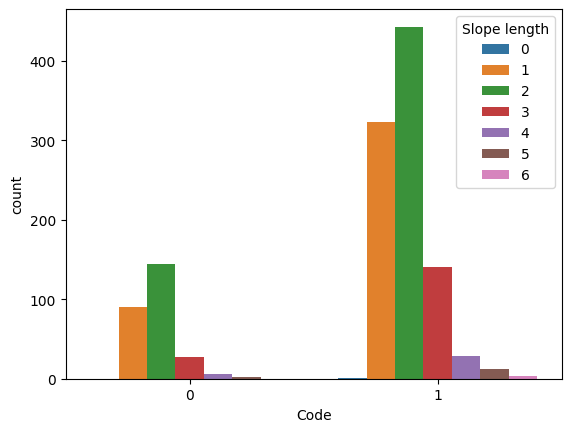

In [13]:
sns.countplot(x ="Code", hue ="Slope length",data = ete)

<Axes: xlabel='Code', ylabel='count'>

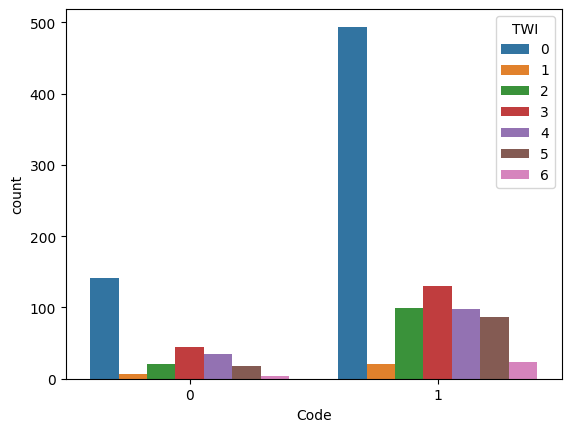

In [14]:
sns.countplot(x ="Code", hue ="TWI",data = ete)

<Axes: xlabel='Code', ylabel='count'>

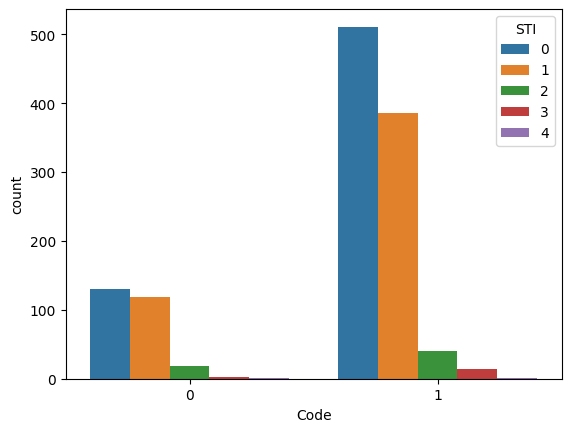

In [15]:
sns.countplot(x ="Code", hue ="STI",data = ete)

In [18]:
ete['Code'].value_counts(normalize=True)

Code
1    0.779689
0    0.220311
Name: proportion, dtype: float64

In [16]:
ete.isnull()

,FID,Type,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,False,False,False,False,False,False,False,False,False,False,False,False,False
1217,False,False,False,False,False,False,False,False,False,False,False,False,False
1218,False,False,False,False,False,False,False,False,False,False,False,False,False
1219,False,False,False,False,False,False,False,False,False,False,False,False,False


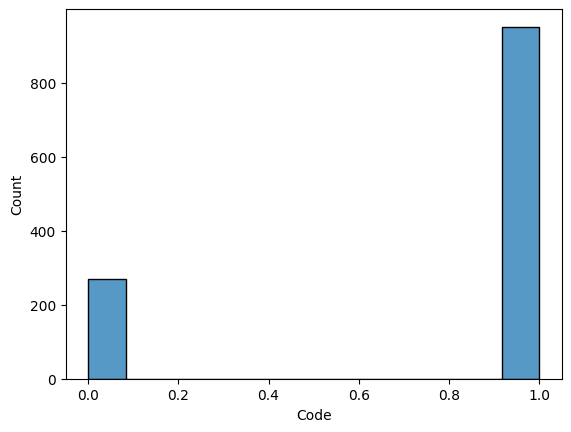

In [17]:
sns.histplot(ete['Code']);

In [18]:
print("skewness: %f" %ete["Code"].skew())

skewness: -1.351326


In [21]:
print("Kurtosis: %f" %ete["Code"].kurt())

Kurtosis: -0.174206


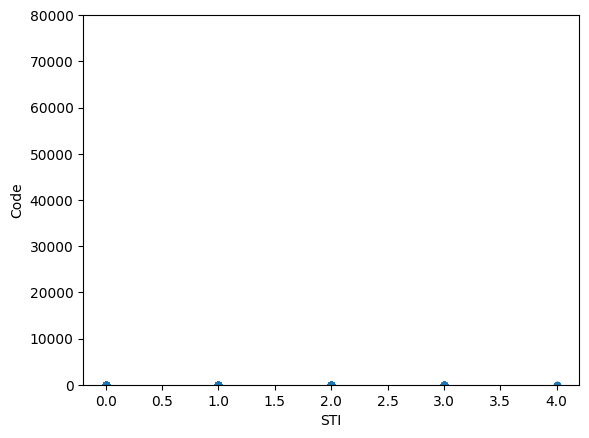

In [22]:
var="STI"
data=pd.concat([ete["Code"],ete[var]],axis=1)
data.plot.scatter(x=var,y='Code',ylim=(0,80000));

<Axes: xlabel='Code', ylabel='count'>

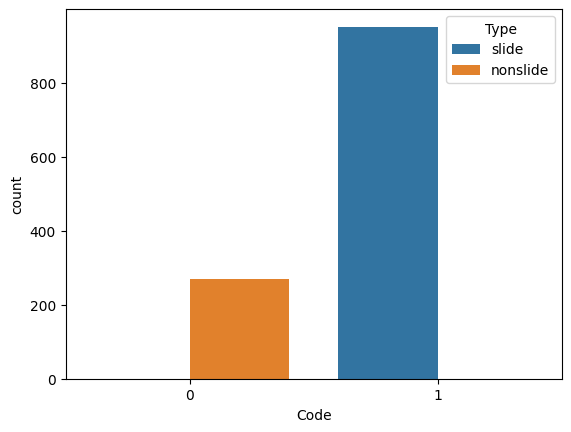

In [23]:
sns.countplot(x ="Code", hue ="Type",data = ete)

In [24]:
ete['Type']=ete['Type'].astype('category')

In [125]:
ete.dtypes

FID                      int64
Type                  category
Code                     int64
Lithology                int64
Altitude                 int64
Slope                    int64
Total curvature          int64
Aspect                   int64
Distance to road         int64
Distance to stream       int64
Slope length             int64
TWI                      int64
STI                      int64
type                  category
dtype: object

In [19]:
ete = ete.drop(['Type'], axis=1)

In [20]:
ete.head()

,FID,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,0,1,1,1,2,1,7,1,5,2,4,1
1,1,1,1,1,3,1,4,2,2,2,5,1
2,2,1,1,1,2,3,7,1,1,1,3,0
3,3,1,1,1,3,1,10,1,2,2,4,0
4,4,1,1,1,3,1,10,1,4,3,5,0


In [77]:
ete.head()

,Unnamed: 0,Code,Lithology,Altitude,Slope,Total curvature,Aspect,Distance to road,Distance to stream,Slope length,TWI,STI
0,336,1,7,3,3,3,8,5,2,4,4,0
1,916,0,8,3,3,1,8,1,4,2,4,0
2,1167,1,5,4,2,2,5,2,5,1,2,0
3,146,1,1,2,3,1,4,4,3,2,2,0
4,537,1,8,3,2,1,6,3,4,2,0,0


In [30]:
features=['Lithology','Altitude','Slope','Total curvature','Aspect','Distance to road','Distance to stream','Slope length','TWI','STI']
X=ete.loc[:,features]
y=ete.loc[:,['Code']]

In [31]:
X.shape

(1221, 10)

In [32]:
y.shape

(1221, 1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=8, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.125, random_state=8, stratify=y_train
)

In [101]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (854, 10)
X_test shape: (245, 10)
y_train shape: (854,)
y_test shape: (245, 1)
X_val shape: (122, 10)
y val shape: (122, 1)


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(X_val.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_val.shape))

<h4>Linear Regression<h4>

In [35]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
lr.score(X_test,y_test).round(3)

0.2

In [37]:
lr.score(X_train,y_train).round(3)

0.215

In [38]:
lr.score(X_val,y_val).round(3)

0.245

In [39]:
y_pred=lr.predict(X_test)

In [40]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.3707465224346441

In [41]:
data_new=X_train[:1]

In [42]:
lr.predict(data_new)

array([[0.6422978]])

In [43]:
y_train[:1]

,Code
670,1


In [44]:
data_new=X_train[:2]

In [45]:
lr.predict(data_new)

array([[0.6422978 ],
       [1.06170255]])

In [100]:
y_train[:2]

array([1, 1], dtype=int64)

<h4>Logistic Regression</h4>

In [72]:
lgtr=LogisticRegression()
lgtr.fit(X_train,y_train)

LogisticRegression()

In [73]:
lgtr.score(X_test,y_test).round(3)

0.755

In [74]:
lgtr.score(X_train,y_train).round(3)

0.796

In [75]:
y_pred=lgtr.predict(X_test)

In [76]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.4948716593053935

In [77]:
data_new=X_train[:1]

In [78]:
lgtr.predict(data_new)

array([0], dtype=int64)

In [79]:
y_train[:1]

array([1], dtype=int64)

In [80]:
data_new=X_train[:2]

In [57]:
lgtr.predict(data_new)

array([0, 1], dtype=int64)

y_train[:2]

In [81]:
predictions=lgtr.predict(X_test)

In [82]:
score = lgtr.score(X_test, y_test)
print(score)

0.7551020408163265


<h4>Random Forest Classifier<h4>

In [61]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\rashm\AppData\Local\Temp\ipykernel_19672\2538021705.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [62]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9142857142857143


In [94]:
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)
y_pred1=rf1.predict(X_val)
accuracy1=accuracy_score(y_val,y_pred1)
print("Accuracy:", accuracy1)


Accuracy: 0.8934426229508197


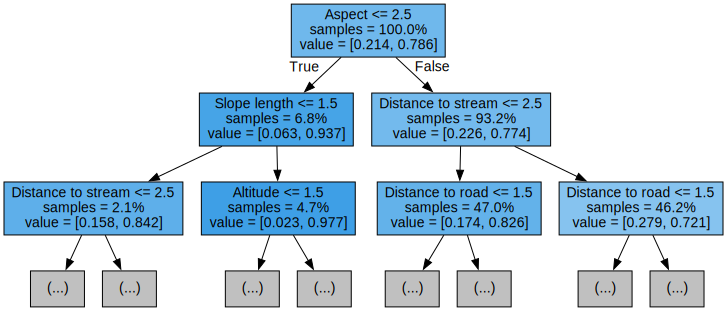

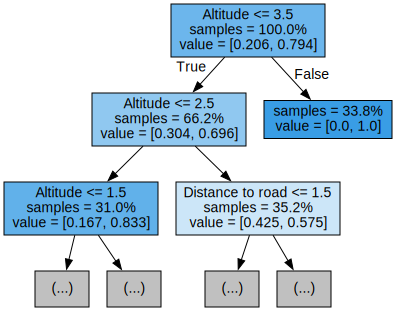

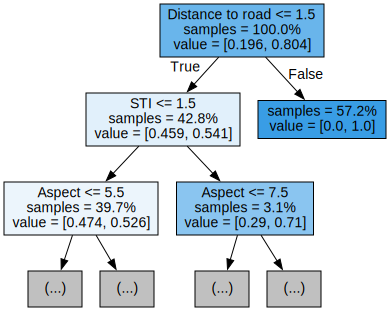

In [63]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [64]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist,n_iter=5, 
                                 cv=5)
y_train = y_train.values.flatten()

rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025BCF0E4FD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025BCF1B6F10>})

In [65]:
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 250}


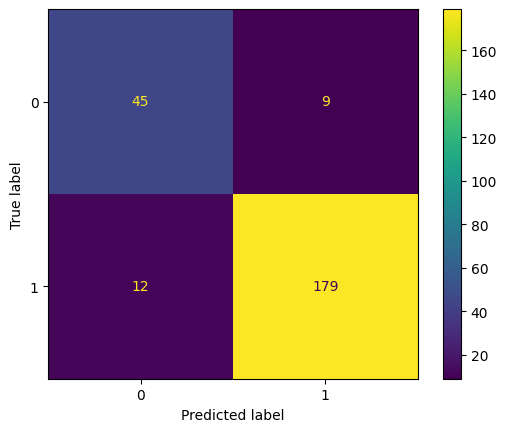

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = best_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [95]:
param_dist = {"n_estimators": randint(50, 500), "max_depth": randint(1, 20)}
rf = RandomForestClassifier(random_state=2023)
rand_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)
best_rf = rand_search.best_estimator_
print("Best hyperparameters:", rand_search.best_params_)
y_pred = best_rf.predict(X_val)
cm1 = confusion_matrix(y_val, y_pred)
print(cm)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 138}
[[ 45   9]
 [ 12 179]]


In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [68]:
from sklearn.metrics import precision_score,recall_score
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8285714285714286
Precision: 0.9027027027027027
Recall: 0.8743455497382199


In [69]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_pred)
print("F1-score:", f1score)



F1-score: 0.8882978723404255


In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [89]:
from sklearn.metrics import precision_score,recall_score
y_pred = knn1.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8278688524590164
Precision: 0.8775510204081632
Recall: 0.9052631578947369


In [98]:
import pickle
pickle.dump(rf, open('rf.pkl', 'wb'))
pickle.dump(rf1, open('rf1.pkl', 'wb'))

In [71]:
metrics = {
    'precision': precision,
    'accuracy': accuracy,
    'recall': recall,
    'f1_score': f1_score
}

In [84]:
import pickle
pickle.dump(rf, open('rf.pkl', 'wb'))

In [68]:
import pickle
pickle.dump(metrics,open'metrics.pickle', 'wb') as file:


print("Metrics saved as pickle file.")

Metrics saved as pickle file.


In [41]:
X_train.to_csv("train.csv", index=True)
X_test.to_csv("test.csv", index=True)


<h4>SVM<h4>
    

In [217]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [218]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [64]:
pickled_model = pickle.load(open('model.pkl', 'rb'))